In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def init_sudoku(n):
  N = n**2
  sudoku = np.random.randint(1, N+1, size=(N,N))
  return sudoku

In [3]:
def calculate_energy(sudoku):
  # size of sudoku and inside-square
  N = len(sudoku)
  n = int(np.sqrt(N))

  # init energy at level 0
  E = 0

  for i in range(N):
    line = sudoku[i, :]
    col = sudoku[:, i]
    r, c = divmod(i, n)
    block = sudoku[r*n:(r+1)*n, c*n:(c+1)*n]
    
    _, line_count = np.unique(line, return_counts=True)
    _, col_count = np.unique(col, return_counts=True)
    _, block_count = np.unique(block, return_counts=True)

    E += np.sum(line_count - 1) + np.sum(col_count - 1) + np.sum(block_count - 1)
  
  return E

In [10]:
def show_sudoku(sudoku):
  N = len(sudoku)
  n = int(np.sqrt(N))

  print(f'Sudoku of size {N}x{N}, current energy: {calculate_energy(sudoku)}\n')
  
  cell_width = len(str(np.max(sudoku))) + 2

  for i in range(n * n):
    # Horizontal block separator
    if i % n == 0 and i != 0:
        print("-" * ((n * n) * cell_width + (n - 1) * 3))

    row_str = []
    for j in range(n * n):

      # Vertical block separator
      if j % n == 0 and j != 0:
          row_str.append(" | ")

      # Center each number
      row_str.append(f"{sudoku[i, j]:^{cell_width}}")

    print("".join(row_str))


In [20]:
def metropolis(sudoku, N, T, nb_iter):
  E = calculate_energy(sudoku)

  # Track energy evolution
  Es = [E]

  for _ in range(nb_iter):
    # A site is chosen at random
    x = np.random.randint(0, N)
    y = np.random.randint(0, N)

    # Change the site
    spin = sudoku[x][y]

    new_spin = random.randint(1, N)
    while new_spin == spin:
      new_spin = random.randint(1, N)

    sudoku[x][y] = new_spin

    # Compute the change in energy if we flip that site
    dE = calculate_energy(sudoku) - Es[-1]
    # Transition probability
    p = np.exp(-dE/T)

    # If the energy decreases, the site flips
    if dE <= 0:
      E += dE
    # If the energy increases, the site flips with probability p.
    elif np.random.rand() <= p:
      E += dE
    else:
      sudoku[x][y] = spin

    Es.append(E)

  return sudoku, Es


Sudoku of size 9x9, current energy: 88

 5  6  9  |  9  6  7  |  7  1  9 
 1  4  9  |  2  3  6  |  3  2  2 
 5  2  5  |  3  6  7  |  7  1  7 
---------------------------------
 8  2  5  |  6  4  7  |  9  1  5 
 4  6  9  |  2  7  6  |  9  8  3 
 7  2  5  |  7  2  5  |  2  7  6 
---------------------------------
 5  9  7  |  4  6  3  |  2  9  6 
 7  8  9  |  9  7  4  |  9  6  3 
 4  6  9  |  8  6  3  |  7  2  3 
Sudoku of size 9x9, current energy: 10

 9  5  3  |  2  7  1  |  7  4  8 
 1  4  7  |  9  8  5  |  3  6  2 
 2  6  8  |  3  4  6  |  5  9  1 
---------------------------------
 8  2  5  |  6  3  4  |  9  1  7 
 4  7  1  |  2  9  8  |  6  8  5 
 3  9  6  |  5  1  7  |  4  3  2 
---------------------------------
 4  1  5  |  7  2  3  |  8  6  9 
 6  8  9  |  1  5  4  |  2  7  3 
 7  3  2  |  8  6  9  |  1  5  4 


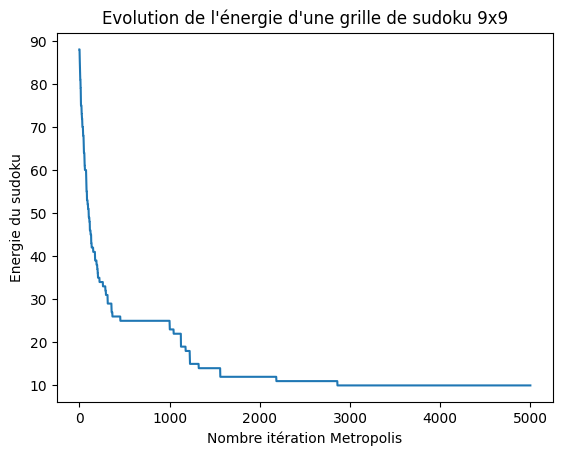

In [34]:
n = 3
N = n**2
T = 0.01
# Metropolis number of iteration
nb_iter = 5000

sudoku = init_sudoku(n)
show_sudoku(sudoku)

t = np.arange(nb_iter + 1) # +1 due to init configuration
sudoku, Es = metropolis(sudoku, N, T, nb_iter)
show_sudoku(sudoku)

plt.plot(t, Es)

plt.xlabel('Nombre itération Metropolis')
plt.ylabel('Energie du sudoku')
plt.title(f'Evolution de l\'énergie d\'une grille de sudoku {N}x{N}')
plt.show()

/var/folders/3_/wvrjtxj15lz0gq4qrprc2sk80000gn/T/ipykernel_6811/628361474.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  p = np.exp(-dE/T)
/var/folders/3_/wvrjtxj15lz0gq4qrprc2sk80000gn/T/ipykernel_6811/628361474.py:24: RuntimeWarning: invalid value encountered in scalar divide
  p = np.exp(-dE/T)


Mean of the convergent energy: 26.5


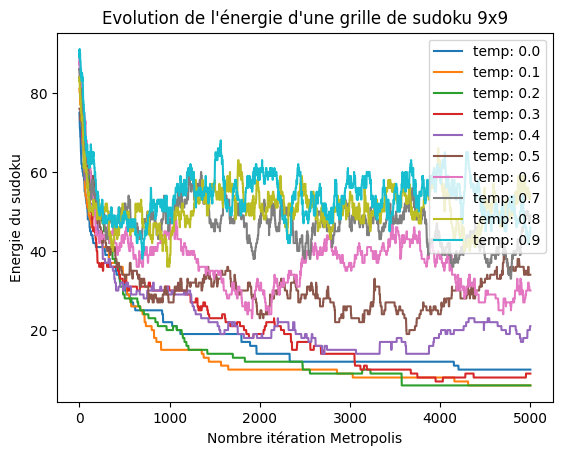

In [43]:
n = 3
N = n**2
T = 0.01
# Metropolis number of iteration
nb_iter = 5000

Es_final = []

for T in np.arange(10)*0.1:
  sudoku = init_sudoku(n)
  init_E = calculate_energy(sudoku)

  t = np.arange(nb_iter + 1) # +1 due to init configuration
  _, Es = metropolis(sudoku, N, T, nb_iter)

  Es_final.append(Es[-1])

  plt.plot(t, Es, label=f'temp: {round(T, 3)}K')

Es_final = np.array(Es_final)
print(f'Mean of the convergent energy: {Es_final.mean()}')
plt.xlabel('Nombre itération Metropolis')
plt.ylabel('Energie du sudoku')
plt.title(f'Evolution de l\'énergie d\'une grille de sudoku {N}x{N}')
plt.legend()
plt.show()


N=3 : 9
N = 4 : 61.475